In [1]:
import numpy
import pandas as pd
import os
import random
from numpy import array
import imageio
from PIL import Image
import PIL
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import tensorflow
import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.optimizers import Adam

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [2]:
data_file = r"C:\Users\ADMIN\Tution\Deep_learning\DL_project\data_files\train\train"

In [3]:
DATASET_PATH = pathlib.Path(data_file)
image_count = len(list(DATASET_PATH.glob('.\\*.jpg')))
print(image_count)

25000


In [4]:
animal = random.choice(list(DATASET_PATH.glob('.\\*.jpg')))
animal

WindowsPath('C:/Users/ADMIN/Tution/Deep_learning/DL_project/data_files/train/train/cat.12307.jpg')

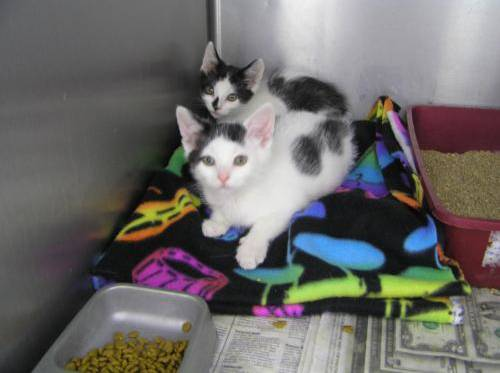

In [5]:
data = Image.open(animal)
#size_of_image = data.size
#print(f'Size of image is {size_of_image}')
data

In [6]:
train_file = r"C:\Users\ADMIN\Tution\Deep_learning\DL_project\data_files\train"
test_file = r"C:\Users\ADMIN\Tution\Deep_learning\DL_project\data_files\test"
filenames = os.listdir("data_files/train/train/")

In [7]:
X_test = []
for i in filenames:
    if('cat' in str(i)):
        X_test.append('cat')
    else:
        X_test.append('dog')

df = pd.DataFrame({
    'file_name': filenames,
    'category': X_test})

df.head(5)

,file_name,category
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


In [8]:
training, validation = train_test_split(df, test_size=0.2)

In [9]:
img_height = 256
img_width = 256
batc_size = 16

In [10]:
image_datagen = ImageDataGenerator(rescale=1./255)

training_df = image_datagen.flow_from_dataframe(
    training,
    "data_files/train/train/",
    x_col = "file_name",
    y_col = "category",
    class_mode='binary',
    target_size=(img_height, img_width),
    batch_size = batc_size
    )

image_datagen = ImageDataGenerator(rescale=1./255)

validation_df = image_datagen.flow_from_dataframe(
    validation,
    "data_files/train/train/",
    x_col = "file_name",
    y_col = "category",
    class_mode='binary',
    target_size=(img_height, img_width),
    batch_size = batc_size
    )

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [11]:
training_df

In [12]:
def model_1():
    model = keras.Sequential([
    keras.Input(shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3, padding="valid", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation="relu"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(2),
    ])
    return model

In [13]:
model = model_1()

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    metrics=["accuracy"],
)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 460800)            0

In [15]:
model.fit(training_df, batch_size=batc_size, epochs=10, verbose=2, validation_data=validation_df)

Epoch 1/10
1250/1250 - 239s - loss: 0.5782 - accuracy: 0.7223 - val_loss: 0.5066 - val_accuracy: 0.7476
Epoch 2/10
1250/1250 - 106s - loss: 0.3858 - accuracy: 0.8288 - val_loss: 0.4986 - val_accuracy: 0.7642
Epoch 3/10
1250/1250 - 86s - loss: 0.2159 - accuracy: 0.9100 - val_loss: 0.5109 - val_accuracy: 0.7848
Epoch 4/10
1250/1250 - 85s - loss: 0.0884 - accuracy: 0.9661 - val_loss: 0.7320 - val_accuracy: 0.7968
Epoch 5/10
1250/1250 - 86s - loss: 0.0523 - accuracy: 0.9816 - val_loss: 0.9369 - val_accuracy: 0.7742
Epoch 6/10
1250/1250 - 85s - loss: 0.0418 - accuracy: 0.9865 - val_loss: 0.9228 - val_accuracy: 0.7842
Epoch 7/10
1250/1250 - 84s - loss: 0.0300 - accuracy: 0.9909 - val_loss: 1.0525 - val_accuracy: 0.7798
Epoch 8/10
1250/1250 - 88s - loss: 0.0273 - accuracy: 0.9914 - val_loss: 1.0530 - val_accuracy: 0.7896
Epoch 9/10
1250/1250 - 86s - loss: 0.0249 - accuracy: 0.9916 - val_loss: 1.3002 - val_accuracy: 0.7800
Epoch 10/10
1250/1250 - 85s - loss: 0.0208 - accuracy: 0.9930 - val_los